# PISA 2012 DATA ANALYSIS
## by Steve Choi
---
## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangle)
 - [Cleaning Data](#cleaning)
 - [Preparing Data](#prep)

<a id='intro'></a>
## Introduction
#### What is PISA?
> PISA (Programme for International Student Assessment) is a worldwide survey to evaluate educational systems by
measuring 15 to 16 years old students' performance on mathematics, science, and reading. The assessments are conducted 
by OECD (Organisation for Economic Co-operation and Development) every three years and are designed to guage how well 
students are prepared for real-life situations in the adult world.

#### PISA 2012 Data
> nearly 480,000 students in 65 countries

<a id='wrangle'></a>
## Preliminary Wrangling

> went over codebook thoroughly for each column

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [36]:
# read PISA data in chunks
lst = []

my_cols = [0, 1, 4, 12, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 501,\
           502, 503, 504, 505, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550]


for chunk in pd.read_csv('data/pisa2012.csv', encoding='ISO-8859-1', index_col=0,\
                         low_memory=False, usecols=my_cols, chunksize=50000):
    lst.append(chunk)
    
df = pd.concat(lst, axis=0)

# clearing memory occupied by lst
del lst

# check
df.head()

,CNT,OECD,ST04Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
4,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
5,Albania,Non-OECD,Female,Yes,Yes,No,Yes,Yes,Yes,Yes,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [37]:
# check shape
df.shape

(485490, 32)

In [38]:
# checking columns
df.columns

Index(['CNT', 'OECD', 'ST04Q01', 'ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04',
       'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10',
       'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14', 'PV1MATH', 'PV2MATH',
       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ',
       'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE',
       'PV5SCIE'],
      dtype='object')

<a id='cleaning'></a>
#### Cleaning Data


In [39]:
# rename columns with more descriptive name
df.rename({    'CNT' : 'country', 
           'ST04Q01' : 'gender',
           'ST26Q01' : 'desk',
           'ST26Q02' : 'own_room',
           'ST26Q03' : 'study_place',
           'ST26Q04' : 'computer',
           'ST26Q05' : 'software',
           'ST26Q06' : 'internet',
           'ST26Q07' : 'literature',
           'ST26Q08' : 'poetry',
           'ST26Q09' : 'art',
           'ST26Q10' : 'textbooks',
           'ST26Q11' : 'technical_references',
           'ST26Q12' : 'dictionary',
           'ST26Q13' : 'dishwasher',
           'ST26Q14' : 'dvd'}, 
           axis='columns', inplace=True
          )

# check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643


In [40]:
# identify nulls
df.isnull().sum()

country                          0
OECD                             0
gender                           0
desk                         12411
own_room                     15797
study_place                  13470
computer                     11613
software                     22312
internet                     12308
literature                   19630
poetry                       18396
art                          18241
textbooks                    14248
technical_reference_books    21924
dictionary                   11451
dishwasher                   16375
dvd                          11414
PV1MATH                          0
PV2MATH                          0
PV3MATH                          0
PV4MATH                          0
PV5MATH                          0
PV1READ                          0
PV2READ                          0
PV3READ                          0
PV4READ                          0
PV5READ                          0
PV1SCIE                          0
PV2SCIE             

In [41]:
# total number of rows with null values
df[df.isnull().any(axis=1)].shape[0]

43867

In [42]:
# drop nulls
df.dropna(inplace=True)

# check shape
df.shape

(441623, 32)

In [43]:
# any duplicates?
df.duplicated().sum()

0

<a id='prep'></a>
#### Preparing Data


In [47]:
# Compute the mean plausible values on each subject per students and store them

# Math
df['math'] = np.mean(df.iloc[:,17:22], axis=1)

# Reading
df['reading'] = np.mean(df.iloc[:,22:27], axis=1)

# Science
df['science'] = np.mean(df.iloc[:,27:], axis=1)

# Check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math,reading,science
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,...,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,355.252569
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,463.695911
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,...,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,477.681011


In [48]:
# drop unnecessary Plausible Value columns
df.drop(columns=df.columns[17:32], inplace=True)

# check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,poetry,art,textbooks,technical_reference_books,dictionary,dishwasher,dvd,math,reading,science
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,366.18634,261.01424,355.252569
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,470.56396,384.68832,463.695911
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,505.53824,405.18154,477.681011


In [13]:
# Replace values in Possession-related columns with True for 'Yes' and False for 'No'
df.iloc[:,3:17] = df.iloc[:,3:17].replace({'No': False, 'Yes':True})

# check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,art,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science,possessions
0,Albania,Non-OECD,Female,True,False,True,False,False,False,False,...,False,True,False,True,False,True,366.18634,261.01424,355.252569,5
1,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,True,True,True,True,470.56396,384.68832,463.695911,12
2,Albania,Non-OECD,Female,True,True,True,True,False,True,True,...,True,True,False,True,False,True,505.53824,405.18154,477.681011,9


In [14]:
# Create 'Possession' column which represents the number of a student possesses out of 7 items
df['possessions'] = df.iloc[:,3:17].sum(axis=1)

# check
df.head()

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,art,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science,possessions
0,Albania,Non-OECD,Female,True,False,True,False,False,False,False,...,False,True,False,True,False,True,366.18634,261.01424,355.252569,6
1,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,True,True,True,True,470.56396,384.68832,463.695911,14
2,Albania,Non-OECD,Female,True,True,True,True,False,True,True,...,True,True,False,True,False,True,505.53824,405.18154,477.681011,11
3,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,False,True,True,False,449.45476,477.46376,456.682931,12
4,Albania,Non-OECD,Female,True,True,False,True,True,True,True,...,True,True,False,True,True,True,385.50398,256.01010,353.900426,12


In [15]:
# save master data
df.to_csv('data\pisa2012_clean.csv', index=False)

## Univariate Exploration

> 1. % Possession per each item

In [6]:
# load clean data and check first five rows
df = pd.read_csv('data\pisa2012_clean.csv')
df.head()

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,art,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science,possessions
0,Albania,Non-OECD,Female,True,False,True,False,False,False,False,...,False,True,False,True,False,True,366.18634,261.01424,355.252569,6
1,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,True,True,True,True,470.56396,384.68832,463.695911,14
2,Albania,Non-OECD,Female,True,True,True,True,False,True,True,...,True,True,False,True,False,True,505.53824,405.18154,477.681011,11
3,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,False,True,True,False,449.45476,477.46376,456.682931,12
4,Albania,Non-OECD,Female,True,True,False,True,True,True,True,...,True,True,False,True,True,True,385.50398,256.01010,353.900426,12


In [27]:
# % student per possession
pct_student = []

for i in range(3,17):
    pct_student.append(round(df.iloc[:,i].sum()/df.shape[0]*100,1))

# create dataframe for first visualization
df_q1 = pd.DataFrame()
df_q1['Possessions'] = list(map(lambda x:x.replace('_', ' ').title(),df.columns[3:17]))
df_q1['% student'] = pct_student

df_q1.sort_values(by=['% student'], ascending=False, inplace=True)
df_q1

,Possessions,% student
11,Dictionary,94.7
13,Dvd,91.0
0,Desk,88.4
3,Computer,86.6
2,Study Place,86.4
5,Internet,84.8
9,Textbooks,82.5
1,Own Room,78.9
8,Art,57.3
12,Dishwasher,57.0


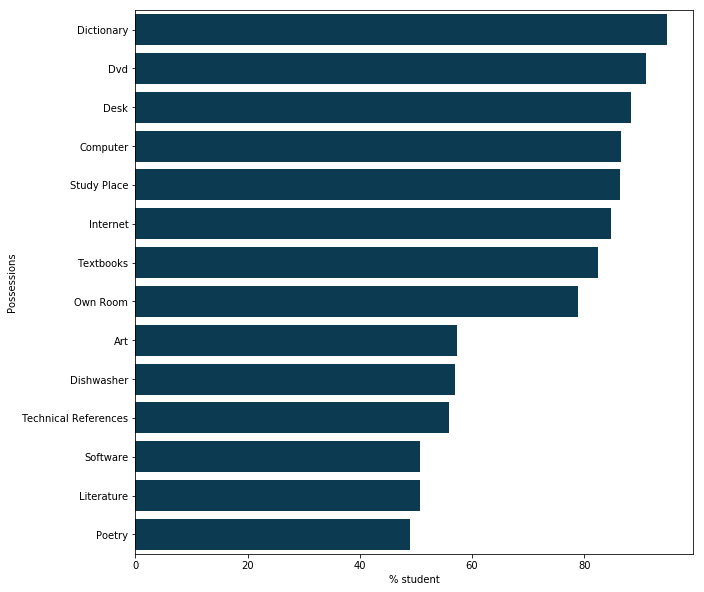

In [28]:
# define figure size,
plt.figure(figsize=(10, 10))

# bar chart using seaborn/ applying palette to distinguish high to low profits
sns.barplot(data=df_q1, x='% student', y='Possessions', color='#003f5c');

> 2. Number of possessions distribution

In [97]:
df['possessions'].value_counts()

11    65497
12    63513
10    59770
13    51721
9     48891
14    41512
8     37026
7     26384
6     18265
5     12290
4      8017
3      4633
2      2483
1      1037
0       584
Name: possessions, dtype: int64

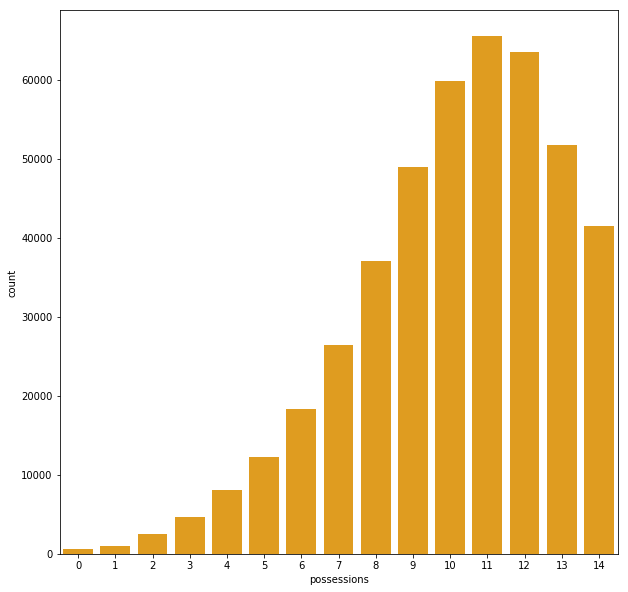

In [100]:
# define figure size,
plt.figure(figsize=(10, 10))

sns.countplot(data=df, x='possessions', color='#ffa600');


> Q3. Performance vs number of possessions

In [31]:
# average performance by number of possessions
df_q3 = df.groupby(['possessions']).mean().iloc[:,-3:]
df_q3

,math,reading,science
possessions,,,
0,365.133557,347.974993,363.311479
1,369.063358,369.868847,374.579473
2,381.772947,385.920900,387.589900
3,389.694482,397.334201,396.178675
4,396.444581,402.692047,402.645270
5,406.281526,412.716781,412.684773
6,415.058193,420.850462,421.380566
7,428.332938,432.033178,433.996403
8,443.061946,445.664119,448.081099


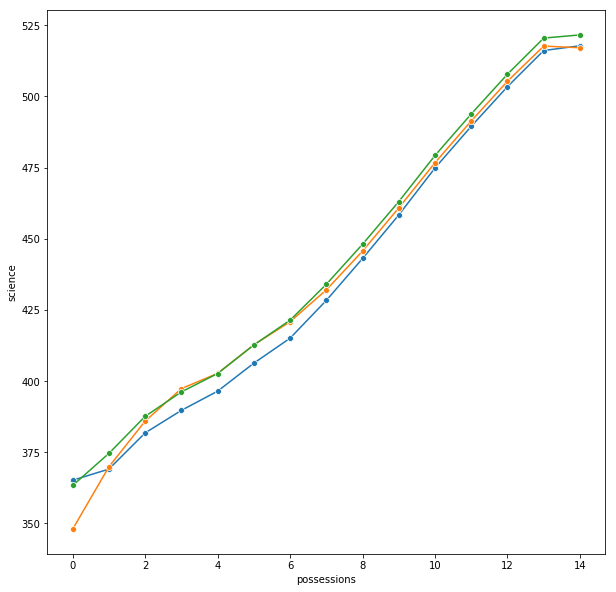

In [56]:
# line plot (averaged data)
plt.figure(figsize=(10, 10))

[sns.lineplot(x=df_q3.index, y=df_q3.iloc[:,i], marker='o', data=df_q3) for i in range(3)];


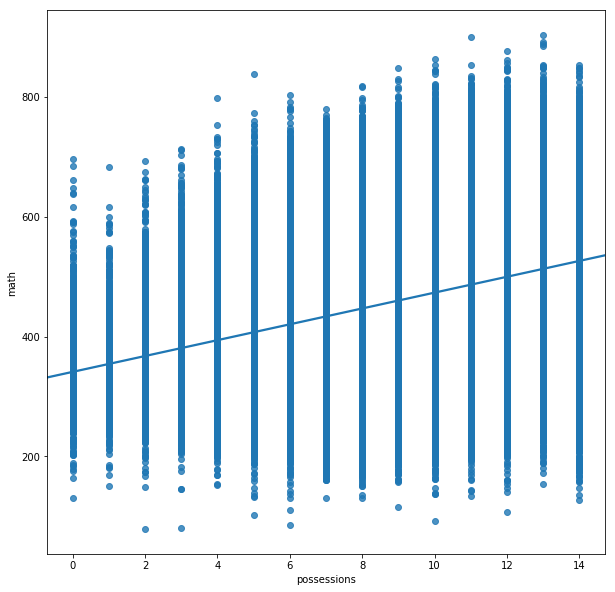

In [57]:
# linear regression (whole data)
plt.figure(figsize=(10, 10))
sns.regplot(x="possessions", y="math", data=df);

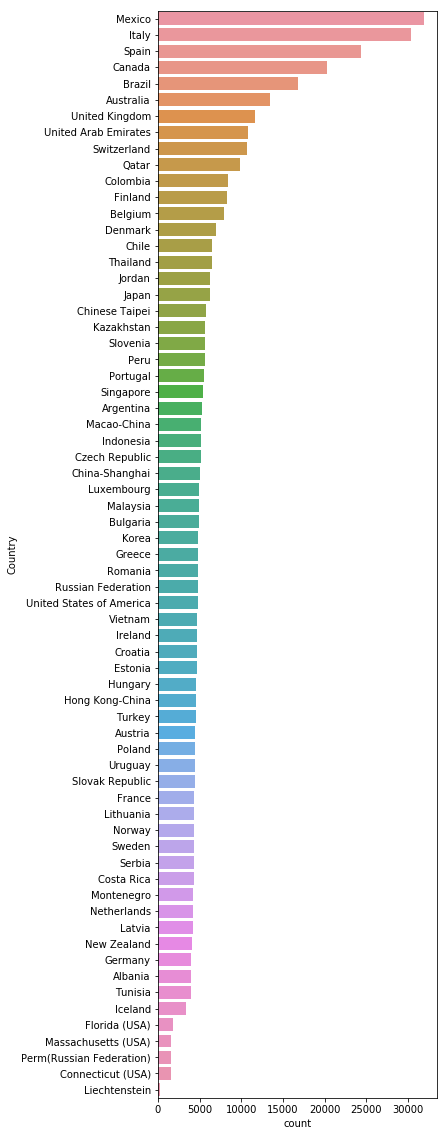

In [13]:
country_order = df['Country'].value_counts().index

plt.figure(figsize=(5, 20))
sns.countplot(data=df, y='Country', order=country_order);

> 1.extra) Number of participated students in each country by Gender

In [14]:
# Number of Male student in each country
boys = df[df['Gender'] == 'Male']['Country'].value_counts()
girls = df[df['Gender'] == 'Female']['Country'].value_counts()
girls = -girls

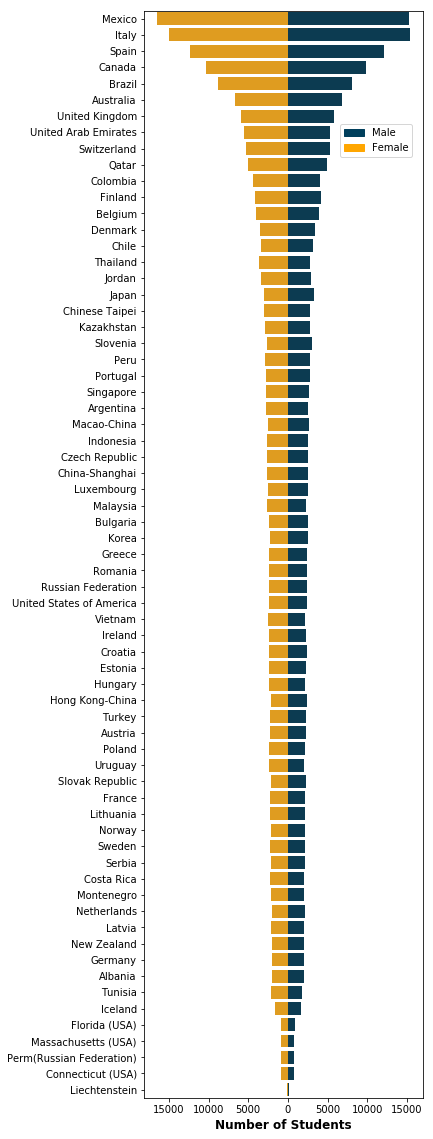

In [15]:
# use same country_order from previous graph

plt.figure(figsize=(5, 20))
sns.barplot(x=boys.values, y=boys.index, order=country_order, color='#003f5c')
sns.barplot(x=girls.values, y=girls.index, order=country_order, color='#ffa600')

xtick_loc = list(range(-15000, 20000, 5000))
xtick_lab = map(abs, xtick_loc)

xlabel = 'Number of Students'
plt.xlabel(xlabel, fontweight='bold', fontsize=12)
plt.xticks(xtick_loc, xtick_lab, fontsize=10);

# add title, legend, x & y labels
male_patch = mpatches.Patch(color='#003f5c', label='Male')
female_patch = mpatches.Patch(color='#ffa600', label='Female')
plt.legend(handles=[male_patch, female_patch], bbox_to_anchor=(0.98, 0.9));

> 

## Bivariate Exploration

> 3. World vs Canada

In [17]:
perf_world = np.mean(df[df['Country'] != 'Canada'].iloc[:, 13:16])
perf_world

Math       472.533302
Reading    474.983050
Science    478.761374
dtype: float64

In [51]:
perf_can = np.mean(df[df['Country'] == 'Canada'].iloc[:, 13:16])
perf_can = pd.DataFrame(perf_can, columns=['Point'])
perf_can['Nation'] = 'Canada'
perf_can

,Point,Nation
Math,512.960331,Canada
Reading,514.948127,Canada
Science,518.039382,Canada


In [52]:
perf_world = np.mean(df[df['Country'] != 'Canada'].iloc[:, 13:16])
perf_world = pd.DataFrame(perf_world, columns=['Point'])
perf_world['Nation'] = 'World'
perf_world

,Point,Nation
Math,472.533302,World
Reading,474.983050,World
Science,478.761374,World


In [55]:
perf_data = perf_can.append(perf_world)
perf_data

,Point,Nation
Math,512.960331,Canada
Reading,514.948127,Canada
Science,518.039382,Canada
Math,472.533302,World
Reading,474.983050,World
Science,478.761374,World


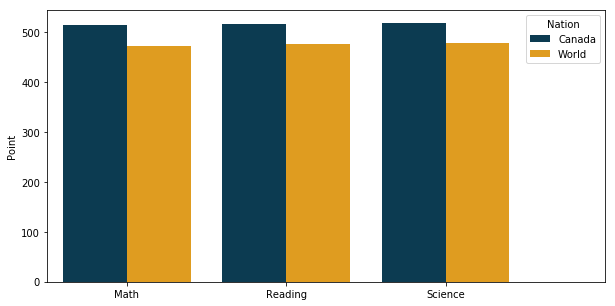

In [74]:
plt.figure(figsize=(10, 5))
sns.barplot(x=perf_data.index, y='Point', hue='Nation', data=perf_data, palette=['#003f5c', '#ffa600']);

plt.xlim(-.5, 3);

# add title, legend, x & y labels


> 


> 3. Student's Possessions (% percent)

In [77]:
df.iloc[:,5:12].mean() * 100

Own_room       78.918975
Study_place    86.407479
Computer       86.615462
Internet       84.820997
Literature     50.665635
Art            57.318214
Textbooks      82.476862
dtype: float64

>- probability of student with 500 or higher (mark >= 500), possess art? 
- A/B Testing vs Number of possessions (eg. students who has both study place and internet outperforms students with neither)
- Top 5 possessions among high-performing students
- Linear regression (relationship between mark vs number of possessions)

- About Country: https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_Chapter%2019.pdf

> Note that for several PISA 2012 participants the value for the CNT variable does not correspond to this classification system. This occurs for two possible reasons. Firstly, where a National Centre represents only part of the country. The codes of this type are QCN for Shanghai representing part of China, QCY for part of Cyprus, QRS for the Perm region of the Russian Federation, QUA,
QUB and QUC for the three states of the United States, Florida, Connecticut and Massachusetts correspondingly. Secondly,
where the National Centre represented only part of the country in a previous cycle, and even though the full country is
participating in PISA 2012, the CNT value has been preserved for consistency. The only participant’s code of this type
is ARE for the United Arab Emirates.

### Testing

In [9]:
# read pisa - dictionaries (column descriptions)
df_colname = pd.read_csv('data/pisadict2012.csv', encoding='ISO-8859-1')

In [7]:
for i in df_colname.index:
    print('{}-{} : {}'.format(i+1,df_colname['Unnamed: 0'].iloc[i], df_colname['x'].iloc[i]))

1-CNT : Country code 3-character
2-SUBNATIO : Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
3-STRATUM : Stratum ID 7-character (cnt + region ID + original stratum ID)
4-OECD : OECD country
5-NC : National Centre 6-digit Code
6-SCHOOLID : School ID 7-digit (region ID + stratum ID + 3-digit school ID)
7-STIDSTD : Student ID
8-ST01Q01 : International Grade
9-ST02Q01 : National Study Programme
10-ST03Q01 : Birth - Month
11-ST03Q02 : Birth -Year
12-ST04Q01 : Gender
13-ST05Q01 : Attend <ISCED 0>
14-ST06Q01 : Age at <ISCED 1>
15-ST07Q01 : Repeat - <ISCED 1>
16-ST07Q02 : Repeat - <ISCED 2>
17-ST07Q03 : Repeat - <ISCED 3>
18-ST08Q01 : Truancy - Late for School
19-ST09Q01 : Truancy - Skip whole school day
20-ST115Q01 : Truancy - Skip classes within school day
21-ST11Q01 : At Home - Mother
22-ST11Q02 : At Home - Father
23-ST11Q03 : At Home - Brothers
24-ST11Q04 : At Home - Sisters
25-ST11Q05 : At Home - Grandparents
26-ST11Q06 : At Home - Others
27-ST13Q

In [3]:
# ggplot2 example
'''
install.packages('ggplot2')
library(ggplot2)

df = read.csv(file.choose()) #select your dataset 
df2 = head(df, 30)


qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', 
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College')

qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', 
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College', 
      color = as.factor(df2$Public..1...Private..2.))

qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score',
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College',
      shape = as.factor(df2$Public..1...Private..2.), color = df2$stud..fac..ratio)

ggplot(df2, aes(x=Math.SAT, y=Verbal.SAT, group=stud..fac..ratio)) +
  geom_point(aes(shape=stud..fac..ratio, color=as.factor(df2$Public..1...Private..2.))
'''

"\ninstall.packages('ggplot2')\nlibrary(ggplot2)\n\ndf = read.csv(file.choose()) #select your dataset \ndf2 = head(df, 30)\n\n\nqplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', \n      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College')\n\nqplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', \n      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College', \n      color = as.factor(df2$Public..1...Private..2.))\n\nqplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score',\n      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College',\n      shape = as.factor(df2$Public..1...Private..2.), color = df2$stud..fac..ratio)\n\nggplot(df2, aes(x=Math.SAT, y=Verbal.SAT, group=stud..fac..ratio)) +\n  geom_point(aes(shape=stud..fac..ratio, color=as.factor(df2$Public..1...Private..2.))\n"

### Things to Consider
1. Color-blind friendly: Use blue-orange palette over red-green
2. Features for additional infor: different encodings
 - color & shape for categorical variables
 - marker size for quantitative variables

### Sample Questions
- How does the choice of school play into academic performance?
- Are there differences in achievement based on gender, location, or student attitudes?
- Are there differences in achievement based on teacher practices and attitudes?
- Does there exist inequality in academic achievement?

### Reference

1. PISA Contest: http://mi2.mini.pw.edu.pl:8080/SmarterPoland/PISAcontest/
2. PISA Survey Design: http://www.oecd.org/pisa/data/pisa2012technicalreport.htm
3. PISA Data and Codebooks: http://www.oecd.org/pisa/data/pisa2012database-downloadabledata.htm